**Linear Regression**
=======================

**Key Terms**
------------

### Training Data

* A collection of examples or instances that are used to teach a machine learning model to make predictions or decisions.

### Features

* **Input variables** / **Predictor variables** / **Independent variables**
* Characteristics or attributes of the data that we use to make predictions.
* **Example:** In the `house_price` example, `number of bedrooms`, `square footage`, and `location` are features because they are the input variables that we use to predict the price of a house.

### Labels

* **Target variables** / **Response variables** / **Dependent variables**
* Values that we are trying to predict or explain.
* **Example:** In the `house_price` example, `price` is the label because it is the value that we are trying to predict based on the features (`number of bedrooms`, `square footage`, and `location`).

### Test Data

* A separate dataset used to evaluate the performance of a trained model using training data.

**Linear Regression Equation**
-----------------------------

The linear regression equation is approximately modeled as:

`Y ≈ β0 + β1 * X`

Or, in a more concise form:

`y = β0 + β1 * x`

**Note:** `β0` and `β1` are the unknown constants representing:

* **Intercept** (`β0`)
* **Slope** (`β1`)

We can also denote these as **Coefficients** or **Parameters**.

here is an example:

In [1]:
import pandas as pd 
data = {
    'size_in_sqft_x' : [1000, 1200, 1500, 1800, 2000],
    'price_y' : [200, 240, 300, 360, 400]
}
df = pd.DataFrame(data)
df

,size_in_sqft_x,price_y
0,1000,200
1,1200,240
2,1500,300
3,1800,360
4,2000,400


#### here is the graphical representation

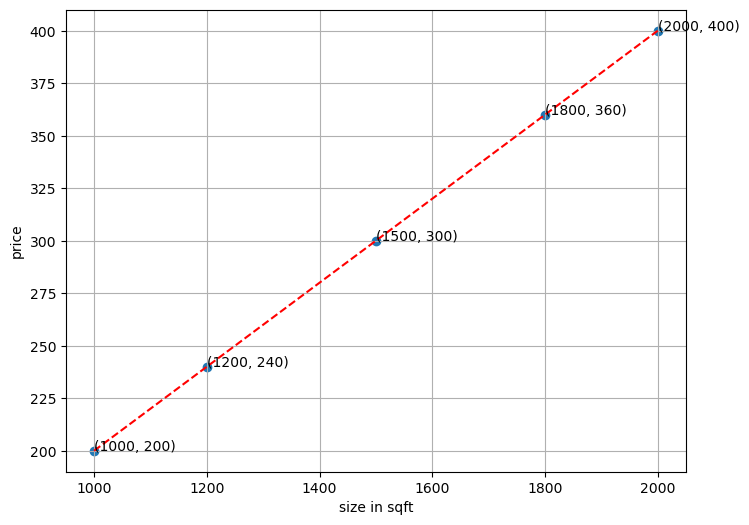

In [2]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8, 6))
plt.scatter(df['size_in_sqft_x'], df['price_y'])
plt.plot(df['size_in_sqft_x'], df['price_y'], color = 'red', linestyle = 'dashed')
for i, row in df.iterrows():
    plt.annotate(f"({row['size_in_sqft_x']}, {row['price_y']})", (row['size_in_sqft_x'], row['price_y']))
plt.xlabel('size in sqft')
plt.ylabel('price')
plt.grid(True)
plt.show()

## LAB: Linear Regression 

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots

In [4]:
import statsmodels.api as sm 

In [5]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [6]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [7]:
A = np.array([3, 2, 4])
# dir(A)

## simple linear regression 

In [8]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [10]:
x = pd.DataFrame({
    'intercept' : np.ones(boston.shape[0]),
    'lstat' : boston['lstat']
})
x.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [11]:
'''
sm.OLS(y, X) creates an Ordinary Least Squares (OLS) regression
model where y is the dependent variable (the outcome we are trying to predict), 
and x is the matrix of independent variables (the predictors).
'''
y = boston['medv']
model = sm.OLS(y, x) 
results = model.fit() 

In [12]:
# print(results.summary())

In [13]:
design = MS(['lstat'])
design = design.fit(boston)
x = design.transform(boston)
x.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [14]:
design = MS(['lstat'])
x = design.fit_transform(boston)
x.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [15]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [16]:
new_df = pd.DataFrame({
    'lstat' : [5, 10, 15]
})
new_x = design.transform(new_df)
print(new_x)

   intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15


In [17]:
new_predictions = results.get_prediction(new_x)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [18]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [19]:
# def abline(ax, b, m):
#     xlim = ax.get_xlim()
#     ylim = [m * xlim[0] + b, m * xlim[1] + b]
#     ax.plot(xlim, ylim)

In [20]:
def abline(ax, b, m, *args , **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim , *args , **kwargs)

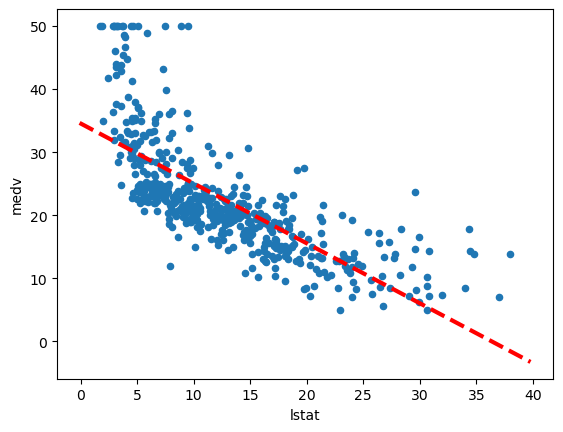

In [21]:
ax = boston.plot.scatter('lstat', 'medv')
abline(ax, results.params.iloc[0], results.params.iloc[1], 'r--', linewidth=3)

374

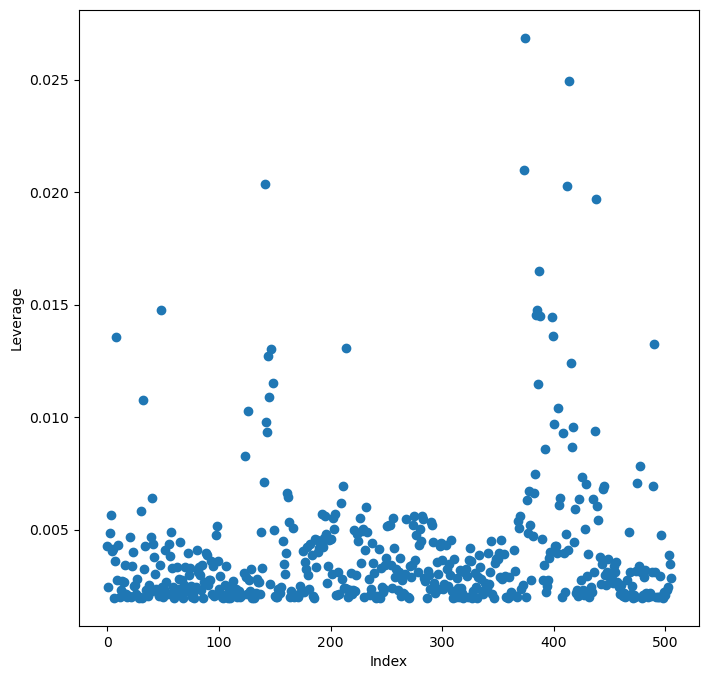

In [22]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### multiple linear regression 

In [23]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [24]:
X = MS(['lstat', 'age']).fit_transform(boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [25]:
terms = boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [26]:
X = MS(terms).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [27]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns [1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [28]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

In [29]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linear Transformations of the Predictors

In [30]:
x = MS([poly('lstat', degree = 2), 'age']).fit_transform(boston)
model3 = sm.OLS(y, x)
result3 = model3.fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [31]:
anova_lm(results1, result3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


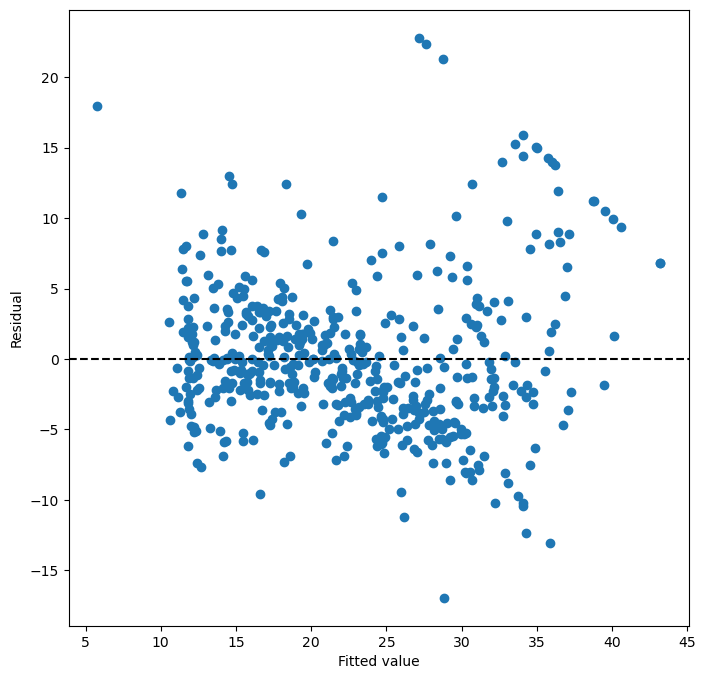

In [32]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(result3.fittedvalues , result3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

### Qualitative Predictors

In [33]:
carseats = load_data('Carseats')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [34]:
allvars = list(carseats.columns.drop('Sales'))
y = carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')]

x = MS(final).fit_transform(carseats)
model = sm.OLS(y, x) 
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


<h4> linear regression example practice </h4>

<h5>single variable</h5>

In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [36]:
data = {
    'area' : [2600, 3000, 3200, 3600, 4000], 
    'price' : [550000, 565000, 610000, 680000, 725000]
}
df = pd.DataFrame(data) 
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


given that home prices find out price of homes whose area is:
1. 3300 sqft
2. 5000 sqft 

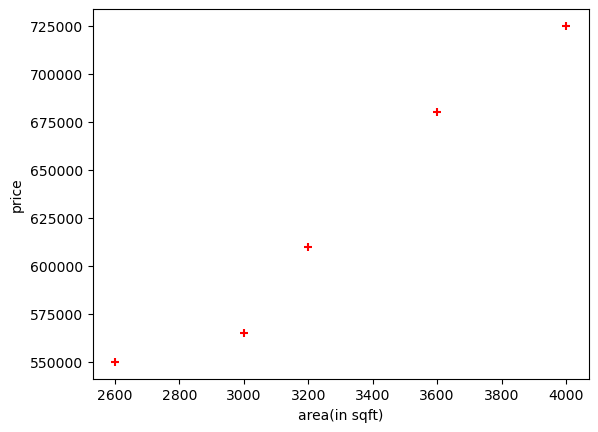

In [37]:
%matplotlib inline
plt.xlabel('area(in sqft)')
plt.ylabel('price')
plt.scatter(df['area'], df['price'], color = 'red', marker='+')

### making an object for the linear model

In [38]:
reg = linear_model.LinearRegression()

In [39]:
reg.fit(df[['area']], df['price'])

LinearRegression()

In [40]:
df_pred = pd.DataFrame({'area' : [3300]})
reg.predict(df_pred)

array([628715.75342466])

In [41]:
df_pred = pd.DataFrame({'area' : [5000]})
reg.predict(df_pred)

array([859554.79452055])

In [42]:
reg.coef_

array([135.78767123])

In [43]:
reg.intercept_

180616.43835616432

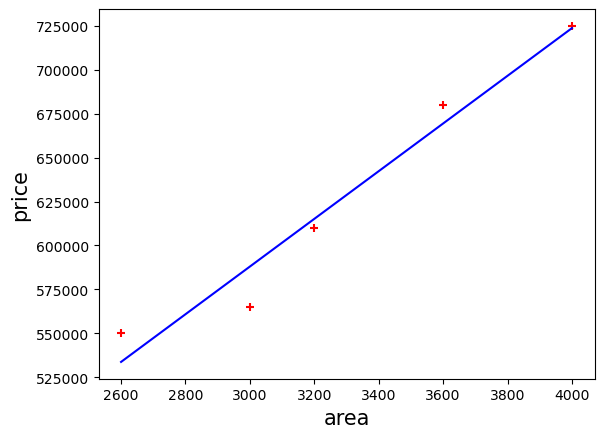

In [44]:
%matplotlib inline
plt.xlabel('area', fontsize = 15)
plt.ylabel('price', fontsize = 15) 
plt.scatter(df['area'], df['price'], color = 'red', marker='+')
plt.plot(df['area'], reg.predict(df[['area']]), color = 'blue')

In [45]:
df1 = pd.read_csv('areas.csv')
df1 

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [46]:
p = reg.predict(df1)

In [47]:
df1['price'] = p 

In [48]:
df1.to_csv('prediction_price.csv', index = False)

In [49]:
df2 = pd.read_csv('canada_per_capita_income.csv')
df2.head() 

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [50]:
reg.fit(df2[['year']], df2['per capita income (US$)'])

LinearRegression()

In [51]:
df_pred = pd.DataFrame({'year' : [2020]})
reg.predict(df_pred)

array([41288.69409442])

In [52]:
reg.coef_, reg.intercept_

(array([828.46507522]), -1632210.7578554575)

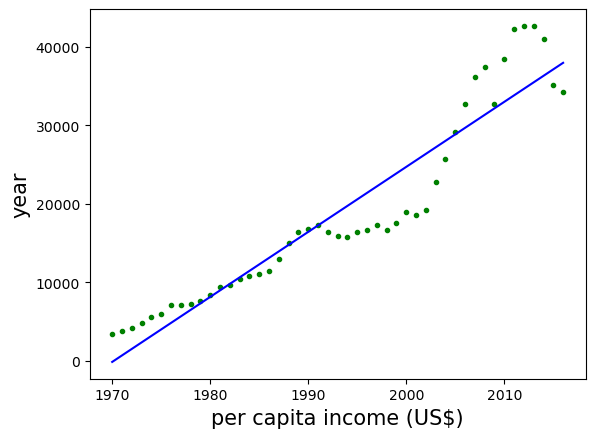

In [53]:
%matplotlib inline
plt.xlabel('per capita income (US$)', fontsize = 15)
plt.ylabel('year', fontsize = 15)
plt.scatter(df2['year'], df2['per capita income (US$)'], color = 'g', marker='.')
plt.plot(df2['year'], reg.predict(df2[['year']]), color = 'blue')

<h5>multiple variables</h5>

In [54]:
data = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, np.nan, 3, 5],
    'age': [20, 15, 18, 30, 8],
    'price': [550000, 565000, 610000, 595000, 760000]
}

df3 = pd.DataFrame(data)
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


data processing: handling missing data 

In [55]:
import math
median_bedrooms = math.floor(df3['bedrooms'].median())
median_bedrooms

3

In [56]:
df3['bedrooms'] = df3['bedrooms'].fillna(median_bedrooms) 
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [57]:
reg.fit(df3[['area', 'bedrooms', 'age']], df3['price'])

LinearRegression()

In [58]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [59]:
reg.intercept_

383724.99999999977

In [60]:
df_pred = pd.DataFrame({
    'area' : [3000], 
    'bedrooms' : [3.0], 
    'age' : [40] 
})
reg.predict(df_pred)

array([444400.])

In [61]:
df_pred = pd.DataFrame({
    'area' : [2500], 
    'bedrooms' : [4.0], 
    'age' : [5] 
})
reg.predict(df_pred)

array([588625.])

In [62]:
from word2number import w2n
import math as m 

In [63]:
df4 = pd.read_csv('hiring.csv')
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [64]:
df4['experience'] = df4['experience'].fillna('zero')
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [65]:
df4['experience'] = df4['experience'].astype(str)
df4['experience'] = df4['experience'].apply(w2n.word_to_num)
df4 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [66]:
test_score_median = m.floor(df4['test_score(out of 10)'].median())
test_score_median

8

In [67]:
df4['test_score(out of 10)'] = df4['test_score(out of 10)'].fillna(test_score_median)
df4 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [68]:
reg.fit(df4[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df4['salary($)']) 

LinearRegression()

In [69]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [70]:
reg.intercept_

17737.26346433768

In [71]:
prediction_1 = pd.DataFrame({
    'experience' : [2], 
    'test_score(out of 10)' : [9.0], 
    'interview_score(out of 10)' : [6] 
})
reg.predict(prediction_1)

array([53205.96797671])

In [72]:
prediction_2 = pd.DataFrame({
    'experience' : [12], 
    'test_score(out of 10)' : [10.0], 
    'interview_score(out of 10)' : [10] 
})
reg.predict(prediction_2)

array([92002.18340611])

## Gradient Descent Algorithm

* Linear Regression: provides the framework and model structure.
* Gradient Descent: provides the method to find the optimal parameters
for the model by minimizing the cost function.

### Steps

1. **Initialize Parameters:**
   $$
   \theta_0 = 0, \quad \theta_1 = 0
   $$

2. **Set Hyperparameters:**
   $$
   \alpha = 0.01 \quad (\text{learning rate})
   $$
   $$
   \text{num\_iterations} = 1000
   $$

3. **Compute Hypothesis:**
   $$
   h_\theta(x_i) = \theta_0 + \theta_1 x_i
   $$

4. **Compute Cost Function Gradient:**
   $$
   \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)
   $$
   $$
   \frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i) x_i
   $$

5. **Update Parameters:**
   $$
   \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)
   $$
   $$
   \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i) x_i
   $$

**here is the implementation**

In [73]:
# Example Data 
x = [1, 2, 3]
y = [1, 2, 3]
m = len(x) 

In [74]:
# initialize the parameters / co-efficient
theta_0 = 0 # intercept
theta_1 = 0 # slop 

In [75]:
# Hyperparameters 
alpha = 0.01
num_of_iterations = 5

In [76]:
# Gradient Decent
for iteration in range(num_of_iterations):
    # compute gradients 
    sum_of_error_theta_0 = 0 
    sum_of_error_theta_1 = 0

    for i in range(m):
        hypothesis = theta_0 * theta_1 * x[i] # y = h(x) =  theta_0 * theta_1 * x
        print(f'Hypothesis Iteration {iteration}: Hypothesis = {hypothesis}')
        error = hypothesis - y[i]
        print(f'Error Iteration {iteration}: Error = {error}')
        sum_of_error_theta_0 = sum_of_error_theta_0 + error
        print(f'Sum of error theta 0 Iteration {iteration}: sum of error theta 0 = {sum_of_error_theta_0}')
        sum_of_error_theta_1 = sum_of_error_theta_1 + error * x[i]
        print(f'Sum of error theta 1 Iteration {iteration}: sum of error theta 1 = {sum_of_error_theta_1}')
        
    print()
     # update parameters  
    theta_0 = theta_0 - (alpha / m) * sum_of_error_theta_0
    theta_1 = theta_1 - (alpha / m) * sum_of_error_theta_1
    
    # print parameters / co-efficients 
    # if iteration % 5 == 0:
    print(f'Iteration {iteration}: theta 0 = {theta_0}, theta 1 = {theta_1}')

Hypothesis Iteration 0: Hypothesis = 0
Error Iteration 0: Error = -1
Sum of error theta 0 Iteration 0: sum of error theta 0 = -1
Sum of error theta 1 Iteration 0: sum of error theta 1 = -1
Hypothesis Iteration 0: Hypothesis = 0
Error Iteration 0: Error = -2
Sum of error theta 0 Iteration 0: sum of error theta 0 = -3
Sum of error theta 1 Iteration 0: sum of error theta 1 = -5
Hypothesis Iteration 0: Hypothesis = 0
Error Iteration 0: Error = -3
Sum of error theta 0 Iteration 0: sum of error theta 0 = -6
Sum of error theta 1 Iteration 0: sum of error theta 1 = -14

Iteration 0: theta 0 = 0.02, theta 1 = 0.04666666666666667
Hypothesis Iteration 1: Hypothesis = 0.0009333333333333334
Error Iteration 1: Error = -0.9990666666666667
Sum of error theta 0 Iteration 1: sum of error theta 0 = -0.9990666666666667
Sum of error theta 1 Iteration 1: sum of error theta 1 = -0.9990666666666667
Hypothesis Iteration 1: Hypothesis = 0.0018666666666666669
Error Iteration 1: Error = -1.9981333333333333
Sum of

In [77]:
# final parameters / co-efficient 
print(f"Final parameters: theta_0 = {theta_0}, theta_1 = {theta_1}")

Final parameters: theta_0 = 0.09944253524255604, theta_1 = 0.23203258223263074
